In [358]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/gapminder.tsv", sep="\t")
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [4]:
subset = df[['country','continent','year']]
subset

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
...,...,...,...
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002


In [11]:
df.loc[0]  # loc : 행단위로 데이터를 추출할 수 있다.
df.iloc[-1] # iloc : 행단위 데이터 추출 + 숫자로 인덱스
list_index = df.shape[0]-1
df.loc[list_index] # 맨 마지막 인덱스

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [12]:
df.loc[[0,100,1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [15]:
type(df.loc[0]) # loc로 추출하면 Series로 추출됨
df.tail(1) # tail. head로 추출된 결과는 DataFrame

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [28]:
df[['year','pop']]
df.loc[:,['year','pop']]
df.iloc[:,[2,4,-1]]

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106
...,...,...,...
1699,1987,9216418,706.157306
1700,1992,10704340,693.420786
1701,1997,11404948,792.449960
1702,2002,11926563,672.038623


In [34]:
df.iloc[:,range(4,6)]

,pop,gdpPercap
0,8425333,779.445314
1,9240934,820.853030
2,10267083,853.100710
3,11537966,836.197138
4,13079460,739.981106
...,...,...
1699,9216418,706.157306
1700,10704340,693.420786
1701,11404948,792.449960
1702,11926563,672.038623


In [36]:
df.iloc[[0,99,999],[0,2,4]] # 행자리, 열자리

,country,year,pop
0,Afghanistan,1952,8425333
99,Bangladesh,1967,62821884
999,Mongolia,1967,1149500


In [38]:
df.loc[[0,99,999],['country','year','pop']] # 행자리, 열자리 // loc는 열 이름으로 접근

,country,year,pop
0,Afghanistan,1952,8425333
99,Bangladesh,1967,62821884
999,Mongolia,1967,1149500


In [40]:
df.year # 1952년에서 시작해서 5년 단위로 존재

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [42]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [47]:
# 연도별 기대수명의 평균
# df.groupby('year') : 그룹화된 객채가 생성됨
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [51]:
# 연도별 + 지역별 기대수명의 평균
df.columns # ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap']
df.groupby(['year','continent'])['lifeExp'].mean() # 두 개의 열을 기준으로 그룹화가 진행됨

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [53]:
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean() # 두 개의 열에 대한 기대수명과 gdp의 평균들

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [56]:
df.groupby('year')['lifeExp'].nunique()
# 그룹화한 데이터의 갯수를 세는 것
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [57]:
import matplotlib.pyplot as plt

In [61]:
gle = df.groupby('year')['lifeExp'].mean()
type(gle)
gle

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

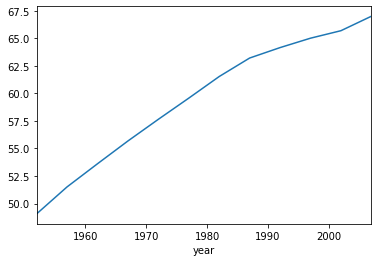

In [63]:
gle.plot()

In [75]:
s = pd.Series(['apple',30], index=['Name','Num'])
s.loc['Num']
s.iloc[1]

30

In [80]:
df = pd.DataFrame({
    'name' : ['aaa','bbb'],
    'age' : [20,30]
}, index = ['first','second'])
df

,name,age
first,aaa,20
second,bbb,30


In [87]:
first_row = df.loc['first']
first_row.index
first_row.keys() # 같은 결과를 얻음

Index(['name', 'age'], dtype='object')

In [89]:
ages = df['age']
ages.mean()

25.0

In [91]:
scientists = pd.read_csv('data/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [94]:
ages=scientists['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [97]:
scientists[ages > ages.mean()]
ages[ages > ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [101]:
ages.sort_index(ascending=False)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [102]:
ages.sort_values()

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [104]:
rev_ages=ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [107]:
print(ages)
print(rev_ages)
print(ages + rev_ages) # 연산의 기준은 인덱스를 기준으로 한다.

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [112]:
scientists
# age열의 평균값보다 큰 scientists 출력
scientists[scientists['Age'] > scientists['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [117]:
scientists.dtypes

Name          object
Born          object
Died          object
Age            int64
Occupation    object
dtype: object

In [119]:
scientists.Born.dtype # "Object"

dtype('O')

In [120]:
pd.to_datetime(scientists.Born) # Object type을 Datetime type으로 변경

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [122]:
bd = pd.to_datetime(scientists.Born, format='%Y-%m-%d')
dd = pd.to_datetime(scientists.Died, format='%Y-%m-%d')
dd

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]

In [124]:
scientists['bd'], scientists['dd'] = bd, dd

In [127]:
scientists['bt'] = scientists.bd - scientists.dd
scientists

,Name,Born,Died,Age,Occupation,bd,dd,bt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,-13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,-22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,-32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,-24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,-20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,-16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,-15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,-28422 days


In [183]:
import random
random.seed(1004)
random.shuffle(scientists['Age']) 
scientists['Age']

0    56
1    41
2    37
3    77
4    45
5    66
6    90
7    61
Name: Age, dtype: int64

In [188]:
# 피클 : 데이터 객체를 그대로 저장
names = scientists['Name']
names.to_pickle('data/sci_name.pickle') 
# 피클로 저장하면 무게가 가벼워서 속도가 빠름
# binary 상태로 저장하므로 그냥 메모장에서 열면 다 깨져서 나온다.
scientists.to_pickle('sci_df.pickle')

In [195]:
sci_name_fp = pd.read_pickle('data/sci_name.pickle')
sci_name_fp

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [196]:
sci_fp = pd.read_pickle('sci_df.pickle')
sci_fp

,Name,Born,Died,Age,Occupation,bd,dd,bt
0,Rosaline Franklin,1920-07-25,1958-04-16,56,Chemist,1920-07-25,1958-04-16,-13779 days
1,William Gosset,1876-06-13,1937-10-16,41,Statistician,1876-06-13,1937-10-16,-22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,37,Nurse,1820-05-12,1910-08-13,-32964 days
3,Marie Curie,1867-11-07,1934-07-04,77,Chemist,1867-11-07,1934-07-04,-24345 days
4,Rachel Carson,1907-05-27,1964-04-14,45,Biologist,1907-05-27,1964-04-14,-20777 days
5,John Snow,1813-03-15,1858-06-16,66,Physician,1813-03-15,1858-06-16,-16529 days
6,Alan Turing,1912-06-23,1954-06-07,90,Computer Scientist,1912-06-23,1954-06-07,-15324 days
7,Johann Gauss,1777-04-30,1855-02-23,61,Mathematician,1777-04-30,1855-02-23,-28422 days


In [198]:
scientists.to_excel('sci.xls')

In [200]:
df1 = pd.read_csv("data/concat_1.csv")
df2 = pd.read_csv("data/concat_2.csv")
df3 = pd.read_csv("data/concat_3.csv")
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [202]:
rc = pd.concat([df1,df2,df3]) # concat 기본형은 위아래로 쭉 붙임, 
#인덱스 초기화 안됨, 동일한 인덱스 계속나올 수 있음
rc

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [211]:
rc.loc[3] # 행 인덱스가 3인 애들이 모두 추출됨
rc.iloc[3] # 순서가 3번째인 행만 추출

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [215]:
nrs = pd.Series(['n1','n2','n3','n4'])
nrs

0    n1
1    n2
2    n3
3    n4
dtype: object

In [216]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [217]:
pd.concat([df1,nrs]) # 공통 열이 없으므로 

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [223]:
ndf = pd.DataFrame([['n1','n2','n3','n4']], columns=['A','B','C','D'])
ndf

,A,B,C,D
0,n1,n2,n3,n4


In [224]:
pd.concat([df1,ndf]) # 공통열이 존재하므로 공통열을 따라서 데이터가 합쳐짐

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [226]:
df1.append(ndf) # concat과 동일한 결과

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [228]:
df1.append(ndf, ignore_index=True) # 동일한 이름의 index 이름이 들어가지 않도록

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [229]:
myDict={'A':'n1','B':'n2','C':'n3','D':'n4'}
myDict

{'A': 'n1', 'B': 'n2', 'C': 'n3', 'D': 'n4'}

In [231]:
df1 # df1 아래에 myDict를 추가하려고 할때
    # dictionary 형태를 추가함

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [235]:
df1.append(myDict, ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [240]:
rci = pd.concat([df1,df2,df3], ignore_index=True)
rci

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [242]:
cc = pd.concat([df1,df2,df3], axis=1)
cc

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [244]:
cc['A'] # 공통 열 이름을 가진 값들이 모두 출력됨

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [246]:
cc['ncl'] = ['n1','n2','n3','n4']
cc

,A,B,C,D,A,B,C,D,A,B,C,D,ncl
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [248]:
cc = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
cc

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [250]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [252]:
df2.columns = ['E','F','G','H'] # Column 명을 바꿔줄 수 있음
df2 

,E,F,G,H
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [254]:
df3.columns=['A','C','F','H']
df3

,A,C,F,H
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [267]:
import warnings
warnings.filterwarnings(action='ignore')
rc = pd.concat([df1,df2,df3], join='inner')  # 공통열만 결합
rc  # df1, df2, df3 모두 가지고 있는 열만 출력 

""
0
1
2
3
0
1
2
3
0
1


In [269]:
pd.concat([df1,df3], join='inner')  # 공통열만 결합
# 공통열인 A와 C열만 합쳐져서 출력됨

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [270]:
df2

,E,F,G,H
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [275]:
df2.index = [4,5,6,7]
df3.index = [0,2,5,7]
df2 # index 명을 바꿔줄 수 있음

,E,F,G,H
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7


In [276]:
cc = pd.concat([df1,df2,df3], axis = 1)
cc

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a10,b10,c10,d10
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,a11,b11,c11,d11


In [277]:
pd.concat([df1,df3], axis=1, join='inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [283]:
person = pd.read_csv('data/survey_person.csv')
site = pd.read_csv('data/survey_site.csv')
survey = pd.read_csv('data/survey_survey.csv')
visited = pd.read_csv('data/survey_visited.csv')

person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [297]:
visited_subset = visited.loc[[0,2,6],]
print(visited_subset)
print(site)

   ident   site       dated
0    619   DR-1  1927-02-08
2    734   DR-3  1939-01-07
6    837  MSK-4  1932-01-14
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40


In [302]:
o2o = site.merge(visited_subset, left_on='name', right_on='site')
print(o2o)
print(site)
print(visited_subset)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
   ident   site       dated
0    619   DR-1  1927-02-08
2    734   DR-3  1939-01-07
6    837  MSK-4  1932-01-14


In [304]:
m2o = site.merge(visited, left_on='name', right_on='site')
print(m2o)
print(site)
print(visited)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
   ident   site       dated
0    619   DR-1  1927-02-08
1    622   DR-1  1927-02-10
2    734   DR-3  1939-01-07
3    735   DR-3  1930-01-12
4    751   DR-3  1930-02-26
5    752   DR-3         NaN
6    837  MSK-4  1932-01-14
7    844   DR-1  1932-03-22


In [321]:
ps = person.merge(survey, left_on='ident', right_on='person')
ps

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [335]:
vs = visited.merge(survey, left_on='ident', right_on='taken')
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [326]:
ps.head(2)

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13


In [327]:
vs.head(2)

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13


In [333]:
ps.merge(vs, left_on=['ident','taken','quant','reading'],right_on=['person','ident','quant','reading'])

,ident_x,personal,family,taken_x,person_x,quant,reading,ident_y,site,dated,taken_y,person_y
0,dyer,William,Dyer,619,dyer,rad,9.82,619,DR-1,1927-02-08,619,dyer
1,dyer,William,Dyer,619,dyer,sal,0.13,619,DR-1,1927-02-08,619,dyer
2,dyer,William,Dyer,622,dyer,rad,7.80,622,DR-1,1927-02-10,622,dyer
3,dyer,William,Dyer,622,dyer,sal,0.09,622,DR-1,1927-02-10,622,dyer
4,pb,Frank,Pabodie,734,pb,rad,8.41,734,DR-3,1939-01-07,734,pb
5,pb,Frank,Pabodie,734,pb,temp,-21.50,734,DR-3,1939-01-07,734,pb
6,pb,Frank,Pabodie,735,pb,rad,7.22,735,DR-3,1930-01-12,735,pb
7,pb,Frank,Pabodie,751,pb,rad,4.35,751,DR-3,1930-02-26,751,pb
8,pb,Frank,Pabodie,751,pb,temp,-18.50,751,DR-3,1930-02-26,751,pb
9,lake,Anderson,Lake,734,lake,sal,0.05,734,DR-3,1939-01-07,734,lake


In [339]:
import numpy as np
np.NaN
np.NAN
np.nan

nan

In [342]:
pd.isnull(np.nan)
pd.notnull("")

True

In [357]:
# 누락값 발생 원인
# 실수로 누락, merge

gap = pd.read_csv('data/gapminder.tsv', sep='\t')
le = gap.groupby(['year'])['lifeExp'].mean()
le.loc[range(2000,2010),] # Nan이 많이 출력
le[le.index>2000] # Nan이 없이 출력

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [370]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')